In [1]:
!apt-get install graphviz -qq
!pip install torchviz -qq
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
import os
import time
import logging
import numpy as np
from torchviz import make_dot
from IPython.display import Image, display
from matplotlib import pyplot as plot

100%|██████████| 170M/170M [00:14<00:00, 12.0MB/s]


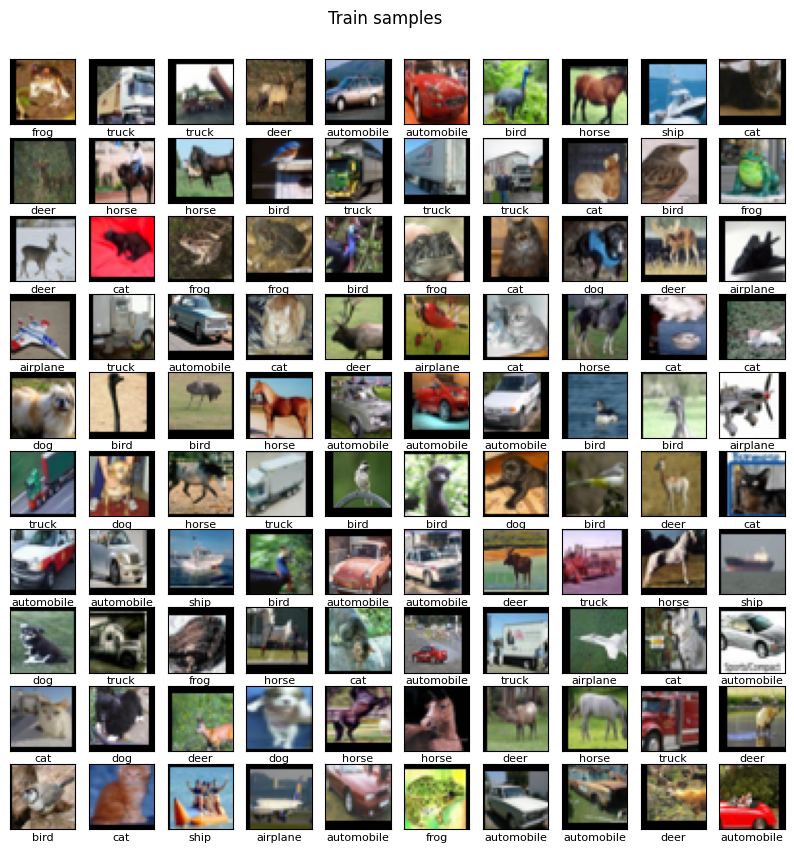

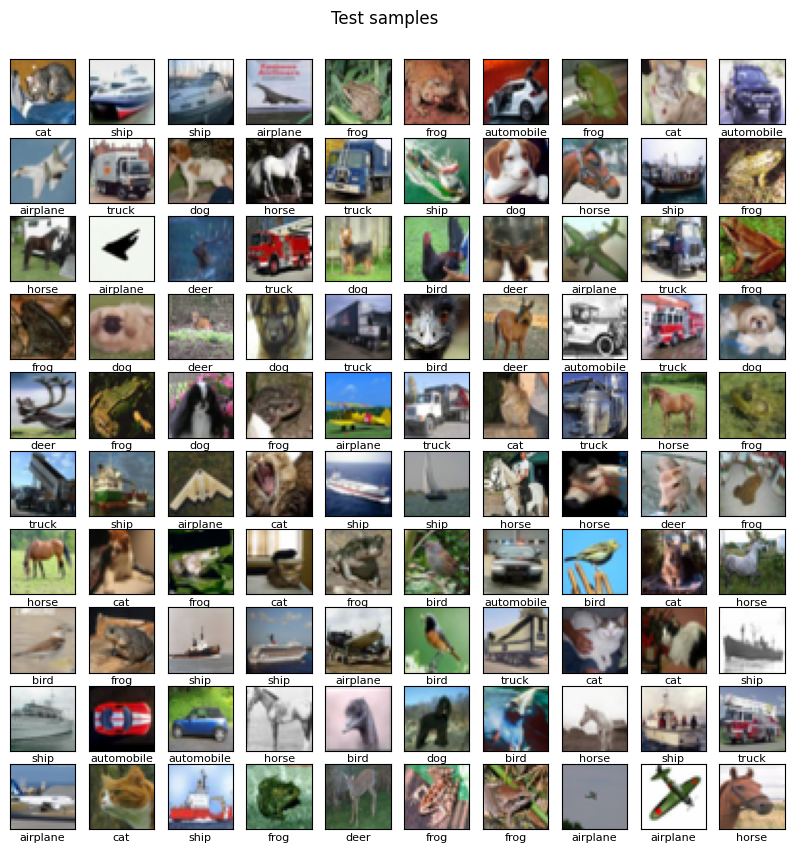

In [2]:
dir_name = os.getcwd()
batch_size = 200


def show_images(images, title):
    num_showed_imgs_x = 10
    num_showed_imgs_y = 10
    figsize = (10, 10)
    fig, axes = plot.subplots(num_showed_imgs_y, num_showed_imgs_x, figsize = figsize)
    fig.suptitle(title, y = 0.93)
    plot.setp(plot.gcf().get_axes(), xticks = [], yticks = [])
    class_names = {
        0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
        5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
    for i, ax in enumerate(axes.flat):
        img = images[i][0].numpy().transpose(1, 2, 0)
        img = img * [0.247, 0.243, 0.261] + [0.491, 0.482, 0.446]
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        label = images[i][1]
        class_name = class_names[label]
        ax.set_xlabel(f'{class_name}', fontsize=8, labelpad=2)


train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261))
])
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261))
])


train_dataset = torchvision.datasets.CIFAR10(root = dir_name,
                                             train = True,
                                             download = True,
                                             transform = train_transform)
test_dataset = torchvision.datasets.CIFAR10(root = dir_name,
                                            train = False,
                                            download = True,
                                            transform = test_transform)
show_images(train_dataset, 'Train samples')
show_images(test_dataset, 'Test samples')
train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                batch_size = batch_size,
                                                shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test_dataset,
                                               batch_size = batch_size,
                                               shuffle = False)

In [3]:
class ConvolutionalNeuralNetwork(torch.nn.Module):
  def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels = 3,
                                    out_channels = 64,
                                    kernel_size = 3,
                                    stride = 1,
                                    padding = 1)
        self.pooling1 = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.bn1 = torch.nn.BatchNorm2d(64)
        self.activation = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(in_channels = 64,
                                    out_channels = 128,
                                    kernel_size = 3,
                                    stride = 1,
                                    padding = 1)
        self.bn2 = torch.nn.BatchNorm2d(128)
        self.conv3 = torch.nn.Conv2d(in_channels = 128,
                                    out_channels = 256,
                                    kernel_size = 3,
                                    stride = 1,
                                    padding = 1)
        self.bn3 = torch.nn.BatchNorm2d(256)
        self.pooling2 = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv4 = torch.nn.Conv2d(in_channels = 256,
                                    out_channels = 512,
                                    kernel_size = 3,
                                    stride = 1,
                                    padding = 1)
        self.bn4 = torch.nn.BatchNorm2d(512)
        self.conv5 = torch.nn.Conv2d(in_channels = 512,
                                    out_channels = 512,
                                    kernel_size = 3,
                                    stride = 1,
                                    padding = 1)
        self.bn5 = torch.nn.BatchNorm2d(512)
        self.linear = torch.nn.Linear(512 * 4 * 4, 10)


  def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.activation(out)
        out = self.pooling1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.activation(out)
        out = self.pooling2(out)
        out = self.conv3(out)
        out = self.bn3(out)
        out = self.activation(out)
        out = self.pooling2(out)
        out = self.conv4(out)
        out = self.bn4(out)
        out = self.activation(out)
        out = self.conv5(out)
        out = self.bn5(out)
        out = self.activation(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


cnn_model = ConvolutionalNeuralNetwork()
print(f"Parameters of convolutions1:\n1. Kernels = {cnn_model.conv1.weight.shape}\n2. Biases = {cnn_model.conv1.bias.shape}")
print(f"Parameters of convolutions2:\n1. Kernels = {cnn_model.conv2.weight.shape}\n2. Biases = {cnn_model.conv2.bias.shape}")
print(f"Parameters of convolutions3:\n1. Kernels = {cnn_model.conv3.weight.shape}\n2. Biases = {cnn_model.conv3.bias.shape}")
print(f"Parameters of convolutions4:\n1. Kernels = {cnn_model.conv4.weight.shape}\n2. Biases = {cnn_model.conv4.bias.shape}")
print(f"Parameters of convolutions5:\n1. Kernels = {cnn_model.conv5.weight.shape}\n2. Biases = {cnn_model.conv5.bias.shape}")
print(f'Parameters of fully-connected layer:\n1. Weight matrix = {cnn_model.linear.weight.shape}\n2. Biases = {cnn_model.linear.bias.shape}')

Parameters of convolutions1:
1. Kernels = torch.Size([64, 3, 3, 3])
2. Biases = torch.Size([64])
Parameters of convolutions2:
1. Kernels = torch.Size([128, 64, 3, 3])
2. Biases = torch.Size([128])
Parameters of convolutions3:
1. Kernels = torch.Size([256, 128, 3, 3])
2. Biases = torch.Size([256])
Parameters of convolutions4:
1. Kernels = torch.Size([512, 256, 3, 3])
2. Biases = torch.Size([512])
Parameters of convolutions5:
1. Kernels = torch.Size([512, 512, 3, 3])
2. Biases = torch.Size([512])
Parameters of fully-connected layer:
1. Weight matrix = torch.Size([10, 8192])
2. Biases = torch.Size([10])


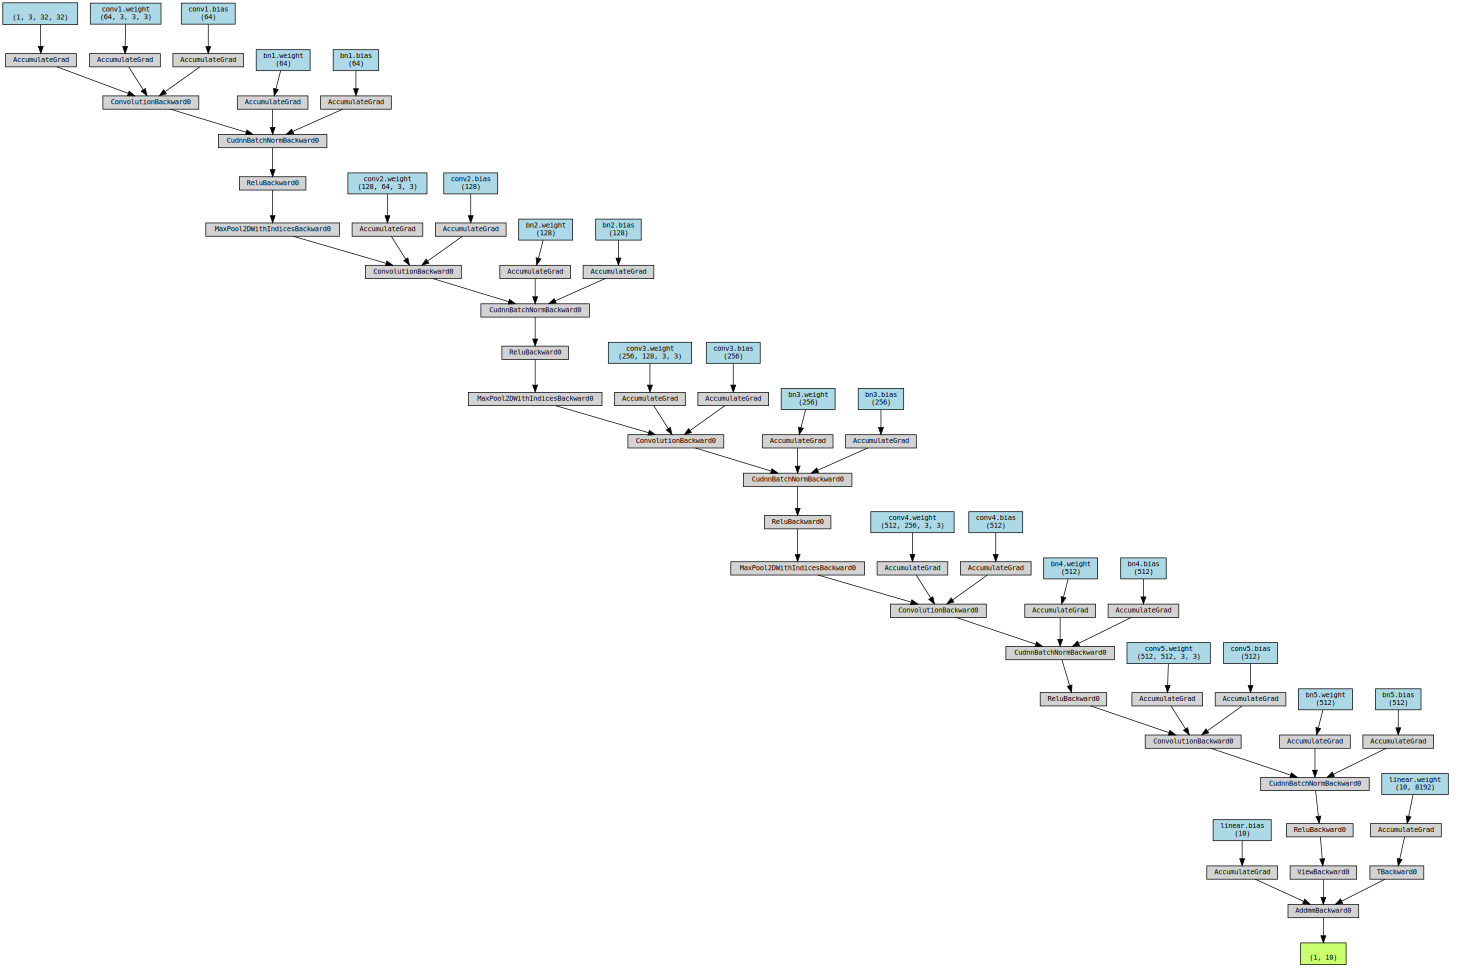

ConvolutionalNeuralNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): ReLU()
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(

In [4]:
learning_rate = 0.1
num_epochs = 51
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr = learning_rate, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 25, 40],  gamma=0.4)


def get_accuracy(data_loader, model, device):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            n += labels.size(0)
            tp += (predicted == labels).sum()
    return tp / n


def graph_visualization(model):
    device = next(model.parameters()).device
    x = torch.randn(1, 3, 32, 32).to(device).requires_grad_(True)
    y = model(x)
    dot = make_dot(y, params=dict(model.named_parameters()))
    display(dot)
    return dot


graph_visualization(cnn_model)
print(cnn_model)
start_time_training = time.time()
sum_time_test = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_data_loader):
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        outputs = cnn_model(images)
        loss = loss_function(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch[{epoch}]: train accuracy = {get_accuracy(train_data_loader, cnn_model, device)}')
    scheduler.step()

    start_time_test = time.time()
    print(f'Test accuracy: {get_accuracy(test_data_loader, cnn_model, device)}')
    end_time_test = time.time()
    res_time_test = end_time_test - start_time_test
    sum_time_test += res_time_test
    mean_time_one_image = res_time_test / len(test_dataset)
    print(f'Average classification time for one image: {mean_time_one_image}')

end_time_training = time.time()
res_time_training = end_time_training - start_time_training - sum_time_test
print(f"Learning time: {res_time_training} секунд")



